#Importing Libraries and downloading required packages

In [ ]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import defaultdict
import operator

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

#Defining necessary functions

###Defining a function for basic text preprocessing

In [ ]:
def text_preprocessing(raw):
  # lower case
  raw = raw.lower()
  # remove numbers
  raw = re.sub(r'\d+', '', raw)
  # remove punctuation
  raw = re.sub(r'[^\w\s]', '', raw)
  # white space removal
  raw = raw.strip()
  #removing any non alphanumeric characters
  raw = re.sub('\W', ' ', raw)  
  #removing extra white spaces
  raw = re.sub('\s+', ' ', raw) 
  #removing chapter numbers and running sections
  raw = re.sub('chapter \w*', '', raw)   
  return (raw)

###Function to calculate frequency 

In [ ]:
def freq(tokens):
# frequency of tokens
  freq = {}
  for t in tokens:
    if t in freq:
      freq[t]+=1
    else:
      freq[t]=1
  return freq

###Function to plot frequency graph

In [ ]:
def freq_graph(tokens):
#frequency graph
  FreqDist(tokens)
  all_fdist = FreqDist(tokens).most_common(60)

  all_fdist = pd.Series(dict(all_fdist))

  fig, ax = plt.subplots(figsize=(10,10))

  all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
  plt.xticks(rotation=90)

###Function to generate and display word cloud

In [ ]:
def word_cloud(freq):
  wc = WordCloud(height = 1000, width = 1500, background_color = 'white', max_words = 1000)
  wc.generate_from_frequencies(freq)
  return wc

In [ ]:
def showCloud(cloud):
    plt.figure(figsize=(10,10))
    plt.imshow(cloud)
    plt.axis('off')

###Function to remove stop words

In [ ]:
def stopwords_text(text):
  stop_words = set(nltk.corpus.stopwords.words('english'))
  x = 65
  y = 97
  for i in range(26):
    stop_words.add(chr(x))
    stop_words.add(chr(y))
    x += 1
    y += 1
  tokens = word_tokenize(text)
  result = [i for i in tokens if not i in stop_words]
  return result

###Function to count words

In [ ]:
words ={}
def word_counter(text):
  words.clear()
  for word in text.split():
    if(len(word)not in words ):
      words[len(word)]=1
    else:
      words[len(word)]+=1

#Loading and Frequency Analysis of a speech

###Opening a txt file

####Text T1

In [ ]:
f = open('/content/Jaishankar.txt')
text = f.read()

####Text T2

In [ ]:
f2 = open('/content/Jaishankar2.txt')
text2 = f2.read()

###Text Preprocessing

In [ ]:
t1 = text_preprocessing(text)

In [ ]:
t2 = text_preprocessing(text2)

###Tokenisation

In [ ]:
t1tokens = nltk.word_tokenize(t1)
t1tokens

['good',
 'morning',
 'everybody',
 'dr',
 'huxley',
 'excellencies',
 'ladies',
 'and',
 'gentlemen',
 'it',
 'is',
 'an',
 'honor',
 'to',
 'deliver',
 'the',
 'twenty',
 'first',
 'iiss',
 'fullerton',
 'lecture',
 'today',
 'in',
 'singapore',
 'as',
 'a',
 'member',
 'myself',
 'of',
 'the',
 'international',
 'institute',
 'of',
 'strategic',
 'studies',
 'being',
 'invited',
 'to',
 'do',
 'so',
 'is',
 'a',
 'particular',
 'source',
 'of',
 'satisfaction',
 'this',
 'invitation',
 'also',
 'brings',
 'me',
 'back',
 'to',
 'singapore',
 'where',
 'i',
 'have',
 'so',
 'many',
 'warm',
 'personal',
 'and',
 'professional',
 'memories',
 'its',
 'good',
 'to',
 'see',
 'friends',
 'sitting',
 'in',
 'the',
 'audience',
 'i',
 'hope',
 'theyll',
 'be',
 'kind',
 'in',
 'the',
 'qa',
 'session',
 'and',
 'so',
 'all',
 'in',
 'all',
 'really',
 'its',
 'good',
 'to',
 'be',
 'back',
 'the',
 'topic',
 'for',
 'todays',
 'talk',
 'is',
 'india',
 'the',
 'united',
 'states',
 'and',

In [ ]:
t2tokens = nltk.word_tokenize(t2)
t2tokens

['mr',
 'president',
 'excellencies',
 'distinguished',
 'members',
 'of',
 'the',
 'general',
 'assembly',
 'i',
 'bring',
 'to',
 'you',
 'the',
 'greetings',
 'of',
 'billion',
 'plus',
 'people',
 'from',
 'the',
 'worlds',
 'largest',
 'democracy',
 'they',
 'join',
 'me',
 'in',
 'congratulating',
 'you',
 'mr',
 'president',
 'on',
 'your',
 'election',
 'to',
 'chair',
 'the',
 'th',
 'session',
 'of',
 'the',
 'un',
 'general',
 'assembly',
 'they',
 'follow',
 'closely',
 'developments',
 'at',
 'the',
 'un',
 'reflecting',
 'the',
 'increasingly',
 'globalized',
 'nature',
 'of',
 'our',
 'existence',
 'we',
 'meet',
 'at',
 'a',
 'challenging',
 'time',
 'for',
 'the',
 'world',
 'order',
 'this',
 'sessions',
 'theme',
 'a',
 'watershed',
 'moment',
 'transformative',
 'solutions',
 'to',
 'interlocking',
 'challenges',
 'seeks',
 'to',
 'capture',
 'its',
 'seriousness',
 'excellencies',
 'the',
 'year',
 'is',
 'an',
 'important',
 'milestone',
 'in',
 'indias',
 'journe

###Freqency analysis

####Calculating frequencies

In [ ]:
t1freq = freq(t1tokens)
print(t1freq)

{'good': 7, 'morning': 2, 'everybody': 1, 'dr': 1, 'huxley': 1, 'excellencies': 1, 'ladies': 1, 'and': 216, 'gentlemen': 1, 'it': 69, 'is': 157, 'an': 32, 'honor': 1, 'to': 182, 'deliver': 1, 'the': 422, 'twenty': 1, 'first': 13, 'iiss': 1, 'fullerton': 2, 'lecture': 3, 'today': 21, 'in': 197, 'singapore': 12, 'as': 41, 'a': 184, 'member': 4, 'myself': 3, 'of': 217, 'international': 12, 'institute': 2, 'strategic': 3, 'studies': 3, 'being': 7, 'invited': 1, 'do': 18, 'so': 74, 'particular': 1, 'source': 5, 'satisfaction': 1, 'this': 50, 'invitation': 2, 'also': 19, 'brings': 1, 'me': 9, 'back': 7, 'where': 15, 'i': 146, 'have': 61, 'many': 6, 'warm': 1, 'personal': 2, 'professional': 1, 'memories': 1, 'its': 49, 'see': 22, 'friends': 1, 'sitting': 1, 'audience': 4, 'hope': 3, 'theyll': 1, 'be': 52, 'kind': 5, 'qa': 1, 'session': 1, 'all': 21, 'really': 17, 'topic': 2, 'for': 62, 'todays': 2, 'talk': 5, 'india': 51, 'united': 12, 'states': 16, 'china': 37, 'now': 17, 'represented': 1, '

In [ ]:
t2freq = freq(t2tokens)
print(t2freq)

{'mr': 6, 'president': 6, 'excellencies': 6, 'distinguished': 1, 'members': 3, 'of': 61, 'the': 90, 'general': 2, 'assembly': 3, 'i': 3, 'bring': 1, 'to': 53, 'you': 5, 'greetings': 1, 'billion': 2, 'plus': 1, 'people': 1, 'from': 3, 'worlds': 1, 'largest': 1, 'democracy': 1, 'they': 8, 'join': 1, 'me': 2, 'in': 37, 'congratulating': 1, 'on': 23, 'your': 1, 'election': 1, 'chair': 2, 'th': 1, 'session': 1, 'un': 5, 'follow': 1, 'closely': 1, 'developments': 1, 'at': 6, 'reflecting': 1, 'increasingly': 1, 'globalized': 1, 'nature': 4, 'our': 21, 'existence': 1, 'we': 34, 'meet': 3, 'a': 26, 'challenging': 1, 'time': 4, 'for': 20, 'world': 9, 'order': 2, 'this': 16, 'sessions': 1, 'theme': 1, 'watershed': 1, 'moment': 1, 'transformative': 1, 'solutions': 1, 'interlocking': 1, 'challenges': 4, 'seeks': 2, 'capture': 1, 'its': 11, 'seriousness': 1, 'year': 3, 'is': 33, 'an': 4, 'important': 1, 'milestone': 1, 'indias': 2, 'journey': 1, 'towards': 1, 'growth': 3, 'development': 4, 'and': 68

####Frequency graph of most frequent 60 words 

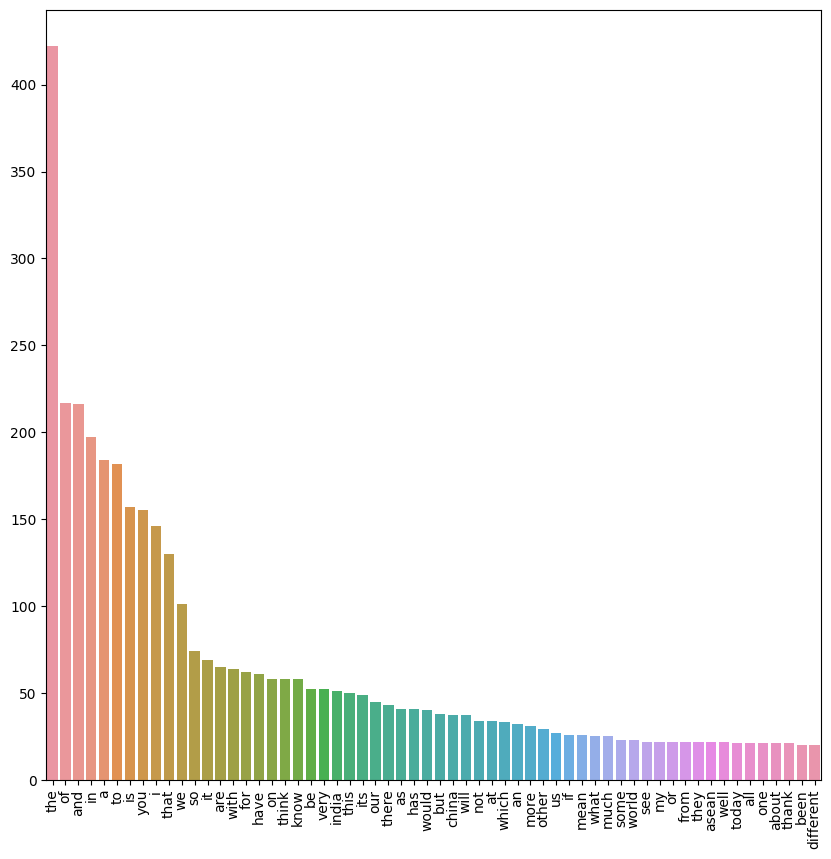

In [ ]:
t1freq_graph = freq_graph(t1tokens)

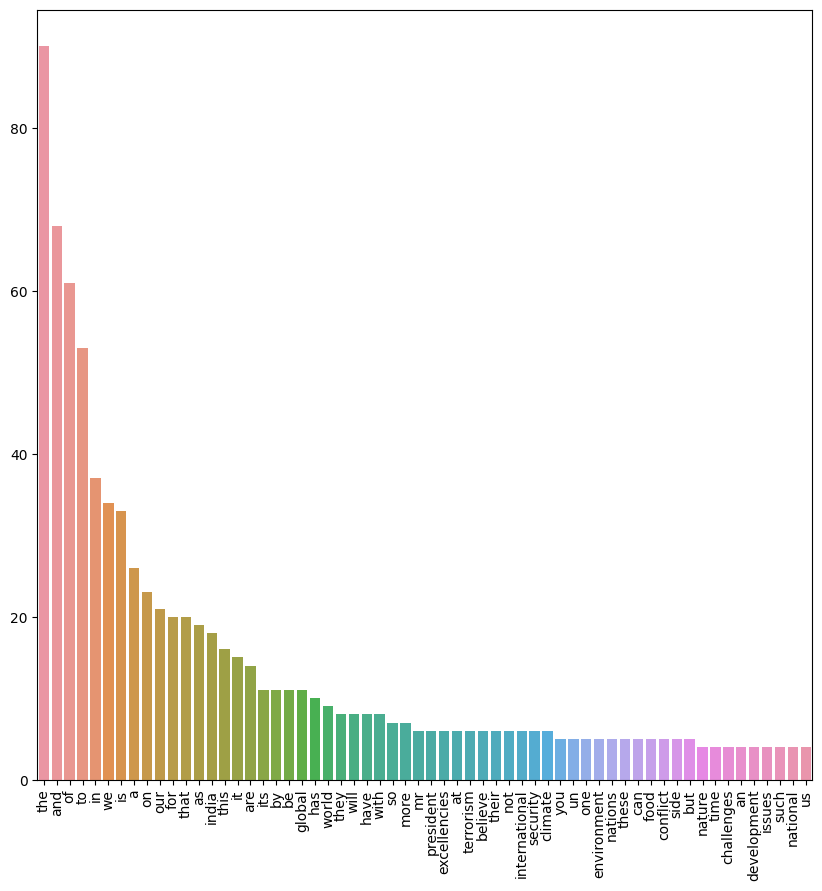

In [ ]:
t2freq_graph = freq_graph(t2tokens)

Generating word cloud without removing stopwords

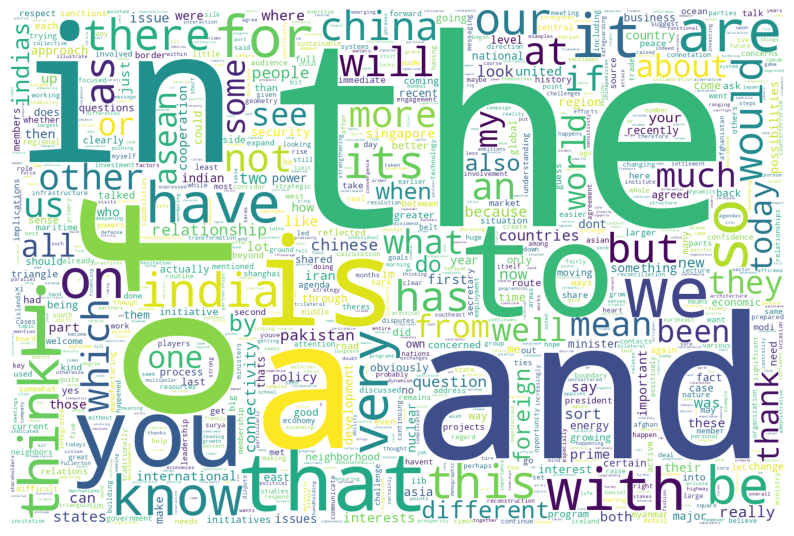

In [ ]:
t1wordcloud = word_cloud(t1freq)
showCloud(t1wordcloud)

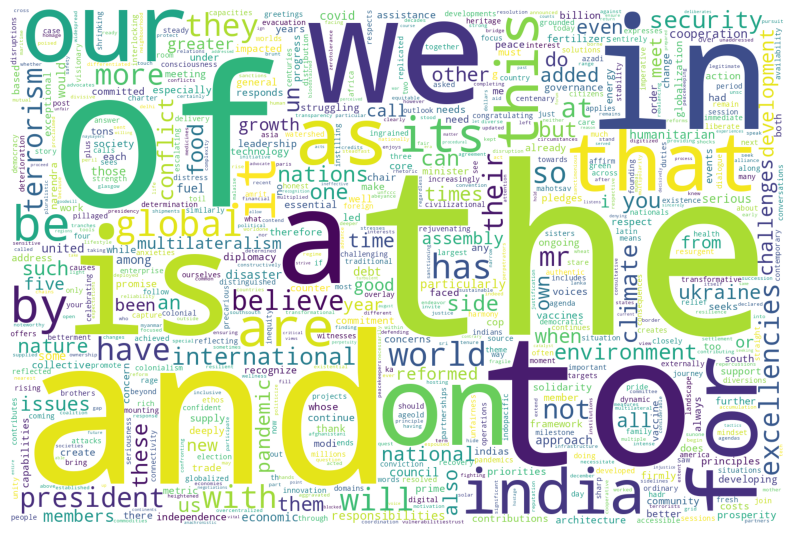

In [ ]:
t2wordcloud = word_cloud(t2freq)
showCloud(t2wordcloud)

###Generating wordcloud without stopwords

####Removing stopwords

In [ ]:
t1nostoptokens = stopwords_text(t1)

In [ ]:
t2nostoptokens = stopwords_text(t2)

####Frequency graph of most frequent 60 words after removing stopwords

---



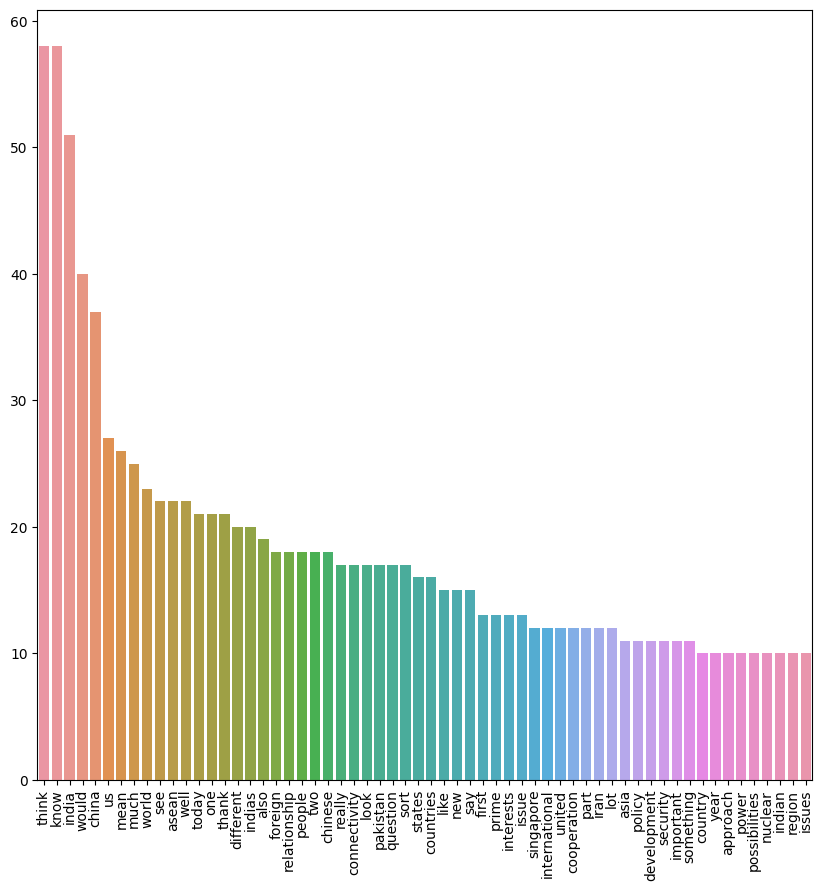

In [ ]:
t1nostopfreq = freq(t1nostoptokens)
t1nostopfreq_graph = freq_graph(t1nostoptokens)

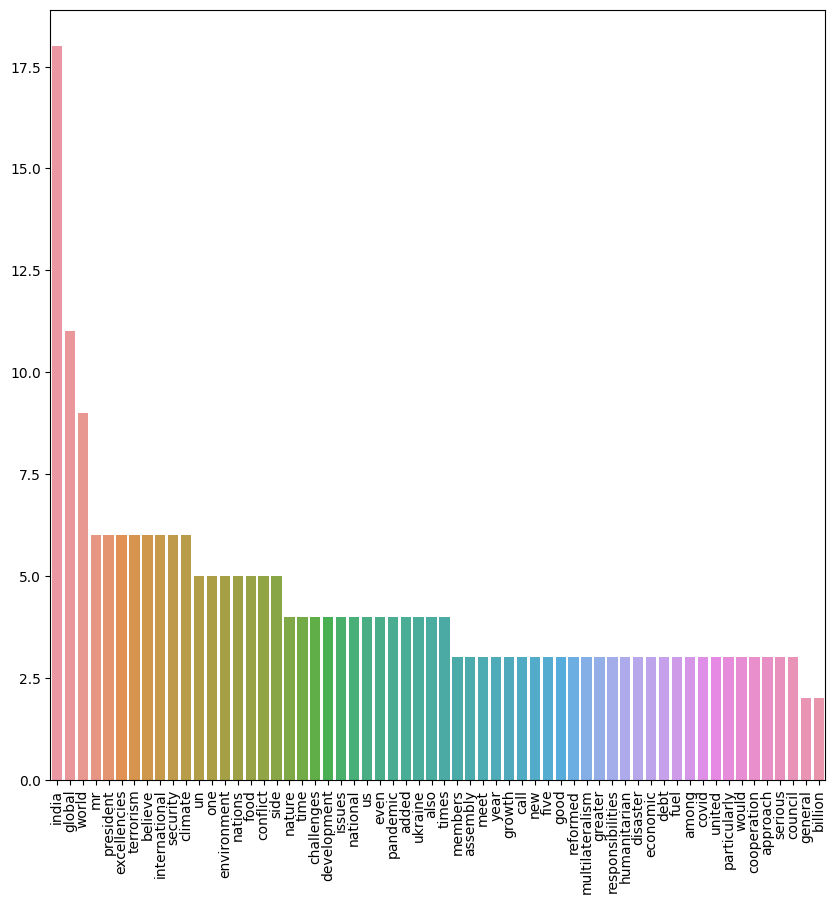

In [ ]:
t2nostopfreq = freq(t2nostoptokens)
t2nostopfreq_graph = freq_graph(t2nostoptokens)

####Wordcloud after removing stopwords

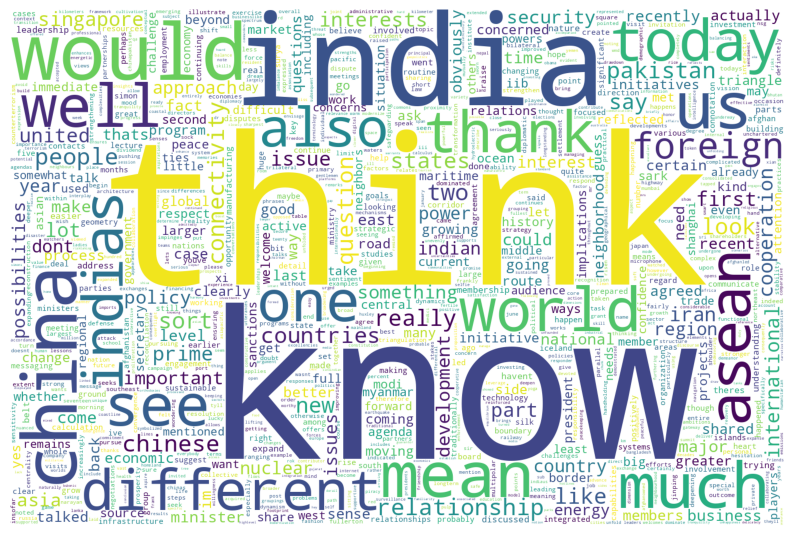

In [ ]:
t1nostopwordcloud = word_cloud(t1nostopfreq)
showCloud(t1nostopwordcloud)

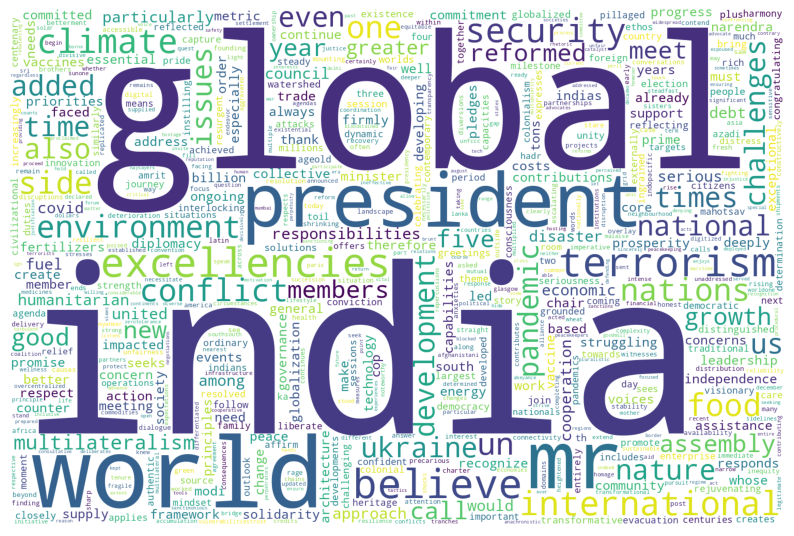

In [ ]:
t2nostopwordcloud = word_cloud(t2nostopfreq)
showCloud(t2nostopwordcloud)

#Frequency relation with length of words

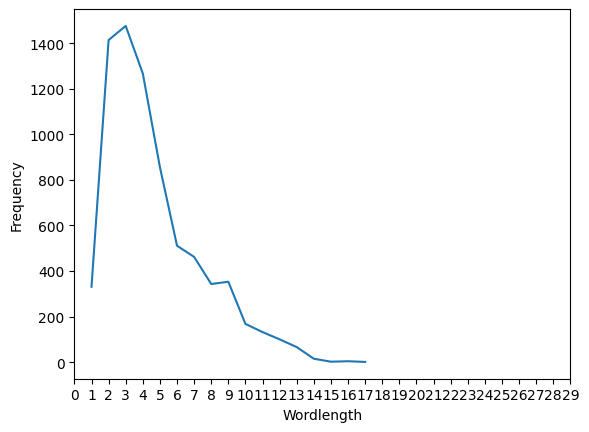

In [ ]:
word_counter(t1)

list_count_t1 = sorted(words.items())
x1, y1 = zip(*list_count_t1)
plt.plot(x1, y1)
plt.xticks(range(0, 30))
plt.rcParams["figure.figsize"] = (15, 10)
plt.xlabel("Wordlength")
plt.ylabel("Frequency")
plt.show()

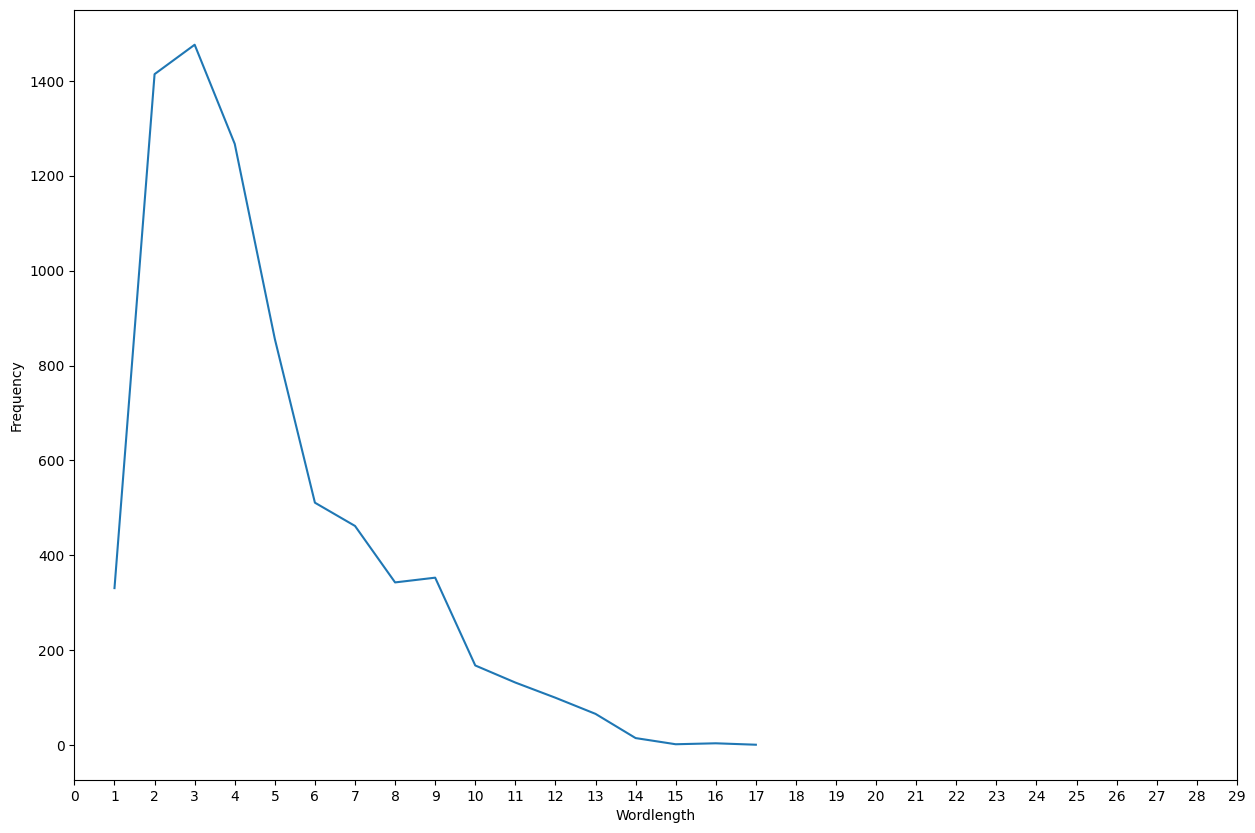

In [ ]:
list_count_t2 = sorted(words.items())
x2, y2 = zip(*list_count_t2)
plt.plot(x2, y2)
plt.xticks(range(0, 30))
plt.rcParams["figure.figsize"] = (15, 10)
plt.xlabel("Wordlength")
plt.ylabel("Frequency")
plt.show()

#POS Tagging the contents of textbook

###Tagging words

In [ ]:
tagged1 = nltk.pos_tag(t1tokens)
tagged1

[('good', 'JJ'),
 ('morning', 'NN'),
 ('everybody', 'NN'),
 ('dr', 'VBZ'),
 ('huxley', 'JJ'),
 ('excellencies', 'NNS'),
 ('ladies', 'NNS'),
 ('and', 'CC'),
 ('gentlemen', 'NNS'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('honor', 'NN'),
 ('to', 'TO'),
 ('deliver', 'VB'),
 ('the', 'DT'),
 ('twenty', 'NN'),
 ('first', 'RB'),
 ('iiss', 'JJ'),
 ('fullerton', 'NN'),
 ('lecture', 'NN'),
 ('today', 'NN'),
 ('in', 'IN'),
 ('singapore', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('member', 'NN'),
 ('myself', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('international', 'JJ'),
 ('institute', 'NN'),
 ('of', 'IN'),
 ('strategic', 'JJ'),
 ('studies', 'NNS'),
 ('being', 'VBG'),
 ('invited', 'VBN'),
 ('to', 'TO'),
 ('do', 'VB'),
 ('so', 'RB'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('particular', 'JJ'),
 ('source', 'NN'),
 ('of', 'IN'),
 ('satisfaction', 'NN'),
 ('this', 'DT'),
 ('invitation', 'NN'),
 ('also', 'RB'),
 ('brings', 'VBZ'),
 ('me', 'PRP'),
 ('back', 'RB'),
 ('to', 'TO'),
 ('singapore', 'VB'),
 ('whe

In [ ]:
tagged2 = nltk.pos_tag(t2tokens)
tagged2

[('mr', 'NN'),
 ('president', 'NN'),
 ('excellencies', 'NNS'),
 ('distinguished', 'VBD'),
 ('members', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('general', 'JJ'),
 ('assembly', 'NN'),
 ('i', 'NN'),
 ('bring', 'VBP'),
 ('to', 'TO'),
 ('you', 'PRP'),
 ('the', 'DT'),
 ('greetings', 'NNS'),
 ('of', 'IN'),
 ('billion', 'CD'),
 ('plus', 'CC'),
 ('people', 'NNS'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('worlds', 'NNS'),
 ('largest', 'JJS'),
 ('democracy', 'NN'),
 ('they', 'PRP'),
 ('join', 'VBP'),
 ('me', 'PRP'),
 ('in', 'IN'),
 ('congratulating', 'VBG'),
 ('you', 'PRP'),
 ('mr', 'VBP'),
 ('president', 'NN'),
 ('on', 'IN'),
 ('your', 'PRP$'),
 ('election', 'NN'),
 ('to', 'TO'),
 ('chair', 'VB'),
 ('the', 'DT'),
 ('th', 'NN'),
 ('session', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('un', 'JJ'),
 ('general', 'JJ'),
 ('assembly', 'NN'),
 ('they', 'PRP'),
 ('follow', 'VBP'),
 ('closely', 'RB'),
 ('developments', 'NNS'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('un', 'JJ'),
 ('reflecting', 'VBG'),
 ('the', 'DT'),

###Plotting the freqency bar graph for POS tags

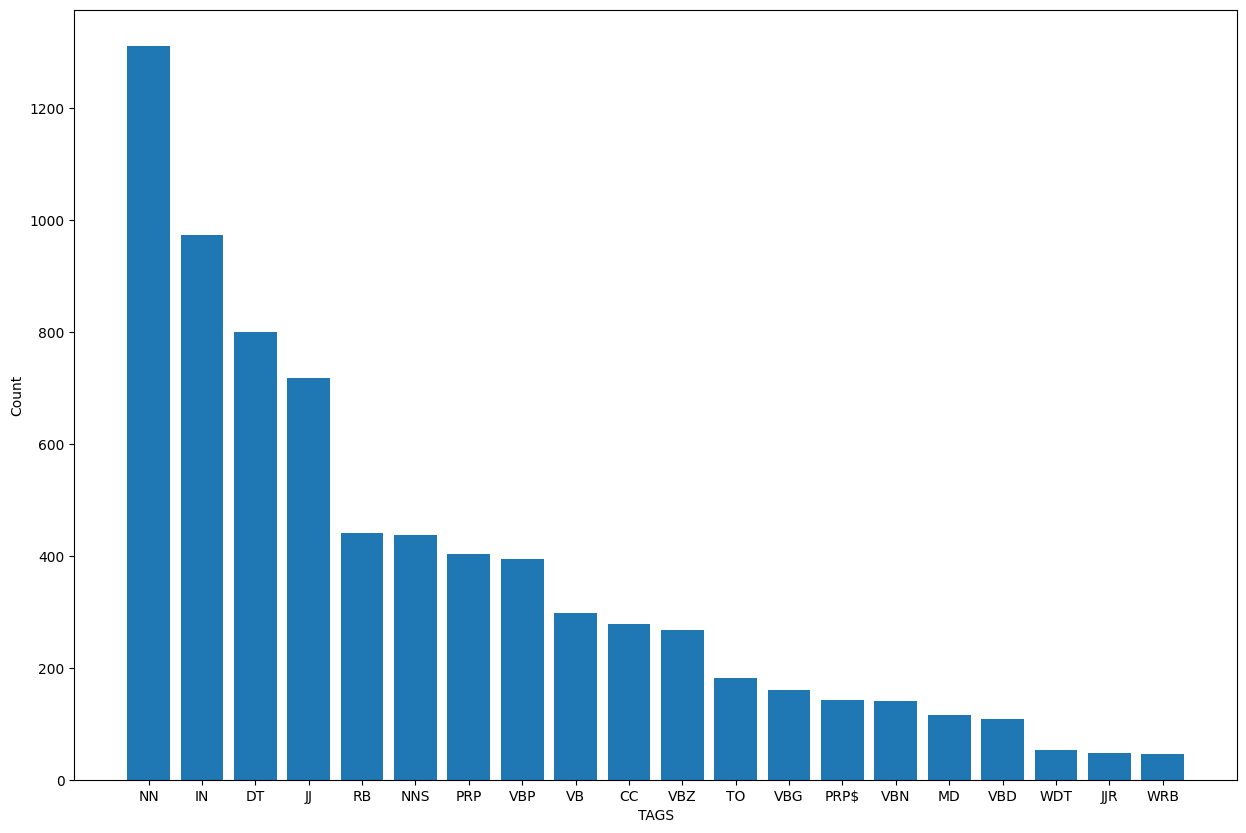

In [ ]:
dict1 = {}
for a, b in tagged1:
    if(b not in dict1):
        dict1[b] = 1
    else:
        dict1[b] += 1

sorted_d1 = dict(sorted(dict1.items(), key=operator.itemgetter(1), reverse=True))


N = 20
out1 = dict(list(sorted_d1.items())[0: N])

plt.bar(out1.keys(), out1.values())
plt.xlabel('TAGS')
plt.ylabel('Count')
plt.show()

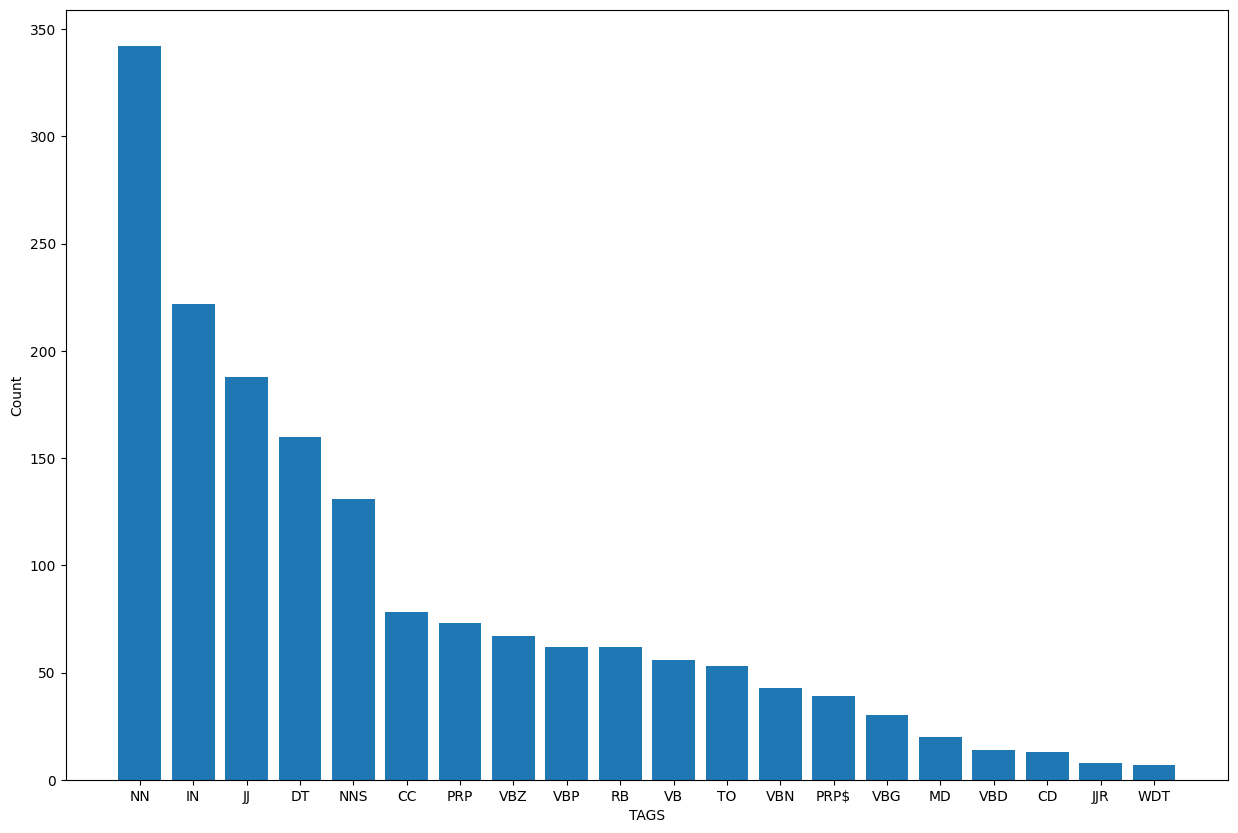

In [ ]:
dict2 = {}
for a, b in tagged2:
    if(b not in dict2):
        dict2[b] = 1
    else:
        dict2[b] += 1

sorted_d2 = dict(sorted(dict2.items(), key=operator.itemgetter(1), reverse=True))


N = 20
out1 = dict(list(sorted_d2.items())[0: N])

plt.bar(out1.keys(), out1.values())
plt.xlabel('TAGS')
plt.ylabel('Count')
plt.show()

#**Round 2**

Seperating nouns and verbs

In [ ]:
T1_nouns = []
T1_verbs = []

for i in tagged1:
  if(i[1] == "NN" or i[1] == "NNS" or i[1] == "NNP" or i[1] =="NNPS"):
    T1_nouns.append(i)
  elif (i[1]=="VB" or i[1]=="VBD" or i[1]=="VBG" or i[1]=="VBN" or i[1]=="VBP" or i[1]=="VBZ"):
    T1_verbs.append(i)

print(T1_nouns)
print(T1_verbs)

[('morning', 'NN'), ('everybody', 'NN'), ('excellencies', 'NNS'), ('ladies', 'NNS'), ('gentlemen', 'NNS'), ('honor', 'NN'), ('twenty', 'NN'), ('fullerton', 'NN'), ('lecture', 'NN'), ('today', 'NN'), ('singapore', 'NN'), ('member', 'NN'), ('myself', 'NN'), ('institute', 'NN'), ('studies', 'NNS'), ('source', 'NN'), ('satisfaction', 'NN'), ('invitation', 'NN'), ('i', 'NN'), ('memories', 'NNS'), ('friends', 'NNS'), ('audience', 'NN'), ('i', 'NN'), ('kind', 'NN'), ('qa', 'NN'), ('session', 'NN'), ('topic', 'NN'), ('talk', 'NN'), ('states', 'NNS'), ('china', 'NN'), ('country', 'NN'), ('association', 'NN'), ('relationships', 'NNS'), ('triangulation', 'NN'), ('outcome', 'NN'), ('experience', 'NN'), ('i', 'NN'), ('interplay', 'NN'), ('india', 'NN'), ('factors', 'NNS'), ('balance', 'NN'), ('asia', 'NN'), ('singapore', 'NN'), ('interest', 'NN'), ('dynamics', 'NNS'), ('process', 'NN'), ('insights', 'NNS'), ('state', 'NN'), ('ties', 'NNS'), ('value', 'NN'), ('states', 'NNS'), ('transformation', 'NN

Categorizing and getting frequency of nouns

In [ ]:
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')
T1_nouns_dict = {}

for i in T1_nouns:
  syn = wordnet.synsets(i[0])
  for j in syn:
    if j.lexname()[0]=='n':
      if j.lexname() in T1_nouns_dict:
        T1_nouns_dict[j.lexname()]+=1
      else:
        T1_nouns_dict[j.lexname()]=1

t3 = sorted(T1_nouns_dict.items(), key=lambda item: item[1], reverse=True)

for i in t3:
  print(i[0][5:] + ": " + str(i[1]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


communication: 982
act: 977
cognition: 976
group: 683
artifact: 661
location: 548
attribute: 545
state: 479
person: 435
time: 283
possession: 239
event: 208
object: 202
quantity: 183
relation: 164
body: 110
substance: 106
phenomenon: 99
process: 93
feeling: 65
Tops: 63
shape: 44
animal: 36
food: 34
motive: 12
plant: 4


Categorizing and getting frequency of verbs

In [ ]:
T1_verbs_dict = {}
for i in T1_verbs:
  syn = wordnet.synsets(i[0])
  for j in syn:
    if j.lexname()[0]=='v':
      if j.lexname() in T1_verbs_dict:
        T1_verbs_dict[j.lexname()]+=1
      else:
        T1_verbs_dict[j.lexname()]=1

t4 = sorted(T1_verbs_dict.items(), key=lambda item: item[1], reverse=True)

for i in t4:
  print(i[0][5:] + ": " + str(i[1]))


stative: 5020
cognition: 1922
possession: 1429
social: 1298
change: 1177
communication: 1078
creation: 738
motion: 627
body: 625
contact: 554
perception: 544
consumption: 256
competition: 180
emotion: 101
weather: 7


Histogram for nouns

([<matplotlib.axis.XTick at 0x7efd4e57eee0>,
 [Text(0, 0, 'noun.time'),
  Text(1, 0, 'noun.communication'),
  Text(2, 0, 'noun.event'),
  Text(3, 0, 'noun.person'),
  Text(4, 0, 'noun.cognition'),
  Text(5, 0, 'noun.state'),
  Text(6, 0, 'noun.attribute'),
  Text(7, 0, 'noun.quantity'),
  Text(8, 0, 'noun.possession'),
  Text(9, 0, 'noun.act'),
  Text(10, 0, 'noun.location'),
  Text(11, 0, 'noun.relation'),
  Text(12, 0, 'noun.body'),
  Text(13, 0, 'noun.group'),
  Text(14, 0, 'noun.artifact'),
  Text(15, 0, 'noun.process'),
  Text(16, 0, 'noun.object'),
  Text(17, 0, 'noun.feeling'),
  Text(18, 0, 'noun.substance'),
  Text(19, 0, 'noun.Tops'),
  Text(20, 0, 'noun.phenomenon'),
  Text(21, 0, 'noun.shape'),
  Text(22, 0, 'noun.motive'),
  Text(23, 0, 'noun.animal'),
  Text(24, 0, 'noun.plant'),
  Text(25, 0, 'noun.food')])

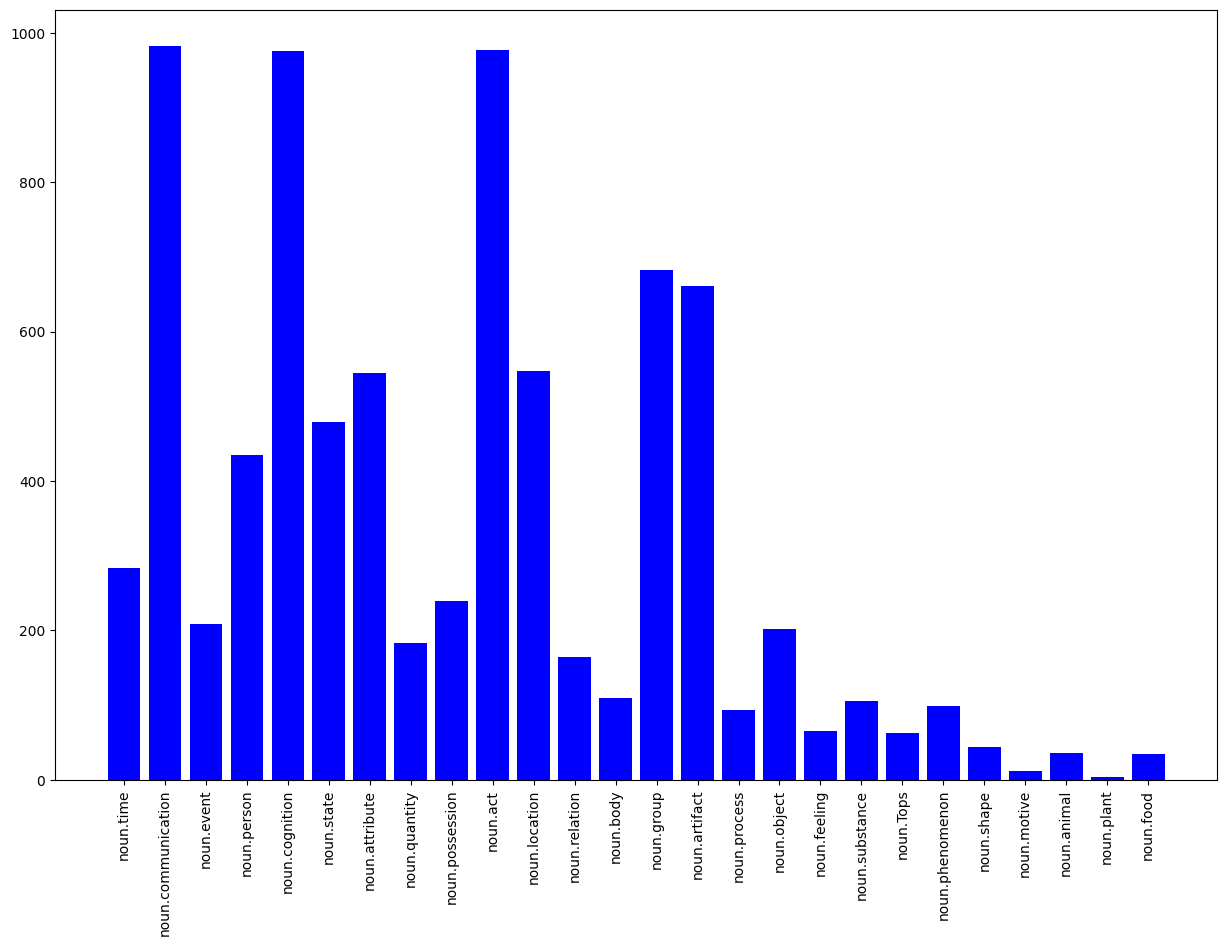

In [ ]:
import matplotlib.pyplot as mplp

mplp.bar(T1_nouns_dict.keys(), T1_nouns_dict.values(),color='b')
y_pos = range(len(T1_nouns_dict.keys()))
mplp.xticks(y_pos, T1_nouns_dict.keys(), rotation=90)

Histogram for verbs

([<matplotlib.axis.XTick at 0x7efd4e637af0>,
 [Text(0, 0, 'verb.stative'),
  Text(1, 0, 'verb.social'),
  Text(2, 0, 'verb.possession'),
  Text(3, 0, 'verb.communication'),
  Text(4, 0, 'verb.contact'),
  Text(5, 0, 'verb.body'),
  Text(6, 0, 'verb.emotion'),
  Text(7, 0, 'verb.creation'),
  Text(8, 0, 'verb.motion'),
  Text(9, 0, 'verb.change'),
  Text(10, 0, 'verb.perception'),
  Text(11, 0, 'verb.consumption'),
  Text(12, 0, 'verb.cognition'),
  Text(13, 0, 'verb.competition'),
  Text(14, 0, 'verb.weather')])

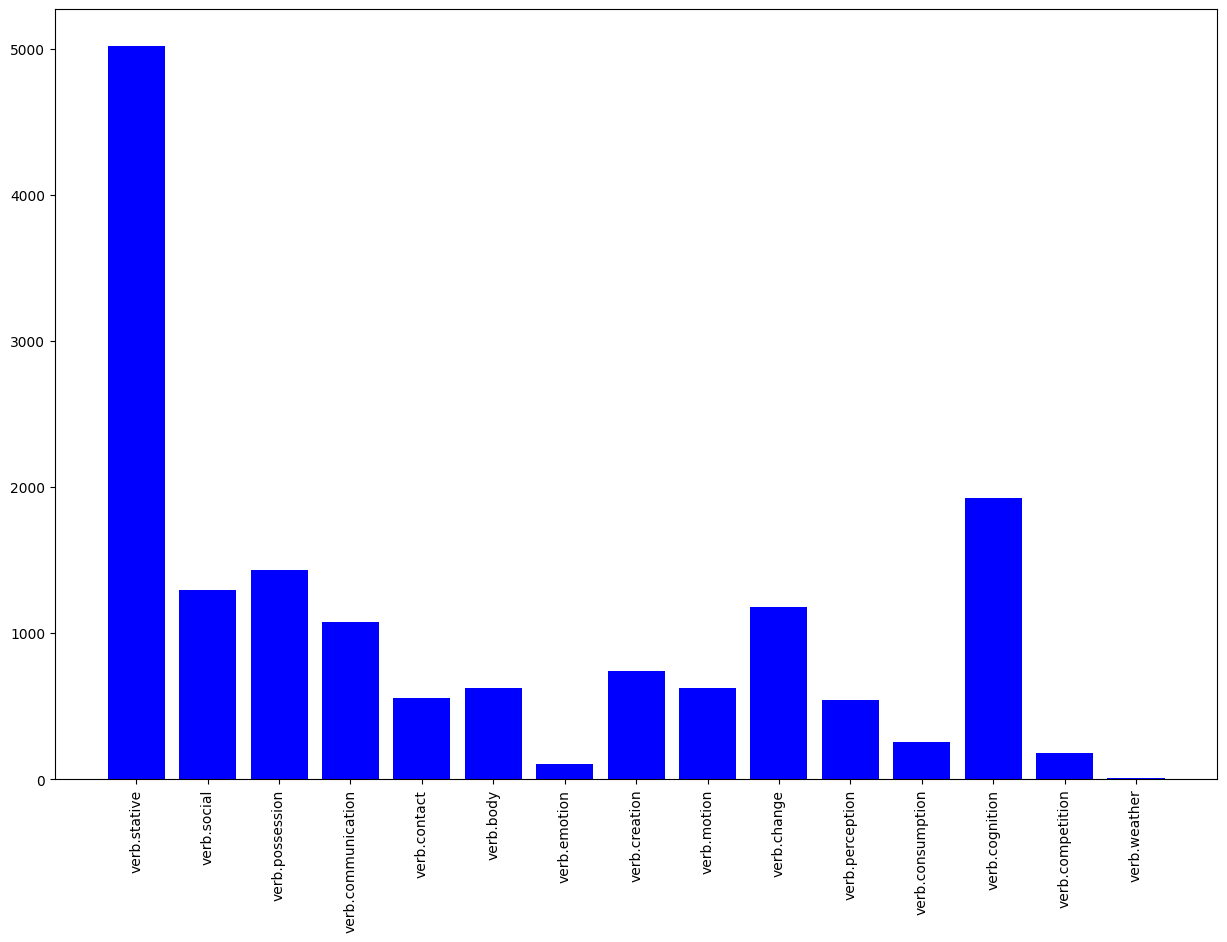

In [ ]:
mplp.bar(T1_verbs_dict.keys(), T1_verbs_dict.values(),color='b')
y_pos = range(len(T1_verbs_dict.keys()))
mplp.xticks(y_pos, T1_verbs_dict.keys(), rotation=90)

Entity Recognition

In [ ]:
import spacy
from spacy import displacy
import en_core_web_sm
from collections import Counter

NER = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 100000000*1000000000

doc1 = nlp(t1)
print([(X.text, X.label_) for X in doc1.ents])

[('dr huxley', 'PERSON'), ('fullerton', 'PERSON'), ('today', 'DATE'), ('singapore', 'GPE'), ('the international institute of strategic studies', 'ORG'), ('singapore', 'GPE'), ('india', 'GPE'), ('the united states', 'GPE'), ('china', 'GPE'), ('us', 'GPE'), ('china', 'GPE'), ('india', 'GPE'), ('us', 'GPE'), ('china', 'GPE'), ('asia', 'LOC'), ('singapore', 'GPE'), ('india', 'GPE'), ('india', 'GPE'), ('the last year', 'DATE'), ('first', 'ORDINAL'), ('india', 'GPE'), ('first', 'ORDINAL'), ('sri lanka', 'GPE'), ('myanmar', 'GPE'), ('pakistan', 'GPE'), ('a week ago', 'DATE'), ('afghanistan', 'GPE'), ('india', 'GPE'), ('afghan', 'NORP'), ('afghan', 'NORP'), ('iran', 'GPE'), ('southeast asia', 'LOC'), ('asia', 'LOC'), ('the middle east', 'LOC'), ('india', 'GPE'), ('kilometer', 'QUANTITY'), ('recent months', 'DATE'), ('indian', 'NORP'), ('india', 'GPE'), ('asia', 'LOC'), ('one', 'CARDINAL'), ('indian', 'NORP'), ('asia', 'LOC'), ('central asia', 'LOC'), ('africa', 'LOC'), ('india', 'GPE'), ('firs

Extracting random passage from the speech

In [ ]:
para_T1 = t1[500:3000] 
doc2 = NER(para_T1)

displacy.render(doc2, jupyter=True, style='ent')

In [ ]:
comp_labels_1 = [x.label_ for x in doc2.ents]
comp_labels_1

NameError: ignored

In [ ]:
from sklearn import metrics
manual_labels_1 =['PERSON', 'ORG', 'ORG', 'PERSON','DATE', 'ORG', 'ORG','ORDINAL','ORDINAL','PERSON', 'NORP', 'FAC', 'ORG', 'GPE', 'LOC', 'PRODUCT', 'EVENT']


# PERSON, NORP, FAC, ORG, GPE, LOC, PRODUCT, EVENT, WORK_OF_ART, LAW, LANGUAGE, DATE, TIME, PERCENT, MONEY, QUANTITY, ORDINAL, CARDINAL

print(metrics.classification_report(manual_labels_1,comp_labels_1))

ValueError: ignored